In [1]:
import openpyxl
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("dataset.xlsx", sheet_name=None, header=0)

In [3]:
all_df = {}
for i, d in enumerate(df.items()):
    name, data = d
    all_df[name] = data
    data['WellID'] = i+1
all_data = pd.concat(df.values())
# all_data = all_df['1K-01']

In [4]:
all_data = all_data[[ "DEPTH", "DT", "GR", "LLD", "NPHI", "RHOB", "Log_Facies", "Fluid", "WellID"]]
all_data = all_data.dropna(axis=0, how='any')
data = all_data

In [5]:
data = data[data['DEPTH'] == data["DEPTH"]]   # drop NaN value row

In [6]:
data['Log_Facies'] = data['Log_Facies'].apply(lambda x: int(x))

In [7]:
comb = [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3)]
def label_facies(row):
    f = row['Fluid']
    lf = row['Log_Facies']
    return comb.index((f, lf)) + 1
data['MixLabel'] = data.apply(label_facies, axis=1)

In [8]:
data.shape

(4695, 10)

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [10]:
X = data[["DEPTH", "DT", "GR", "LLD", "NPHI", "RHOB"]].values
ss = StandardScaler()
X = ss.fit_transform(X)

In [11]:
Y1 = data['Log_Facies']
Y2 = data['WellID']

## Log_Facies

### PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
n_components = 2
colors = ["b", "g", "r", "c", "k", "y"]

In [14]:
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(X)
Y_colors = Y1.apply(lambda x: colors[x])

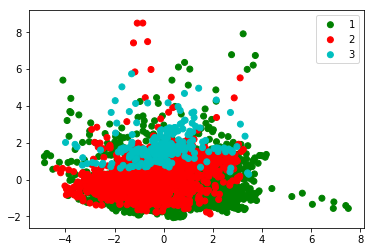

In [15]:
# plt.scatter(pca_data[:, 0], pca_data[:, 1], c=Y_colors.values)

for i in list(set(Y1)):
    scatter = plt.scatter(pca_data[:, 0][Y1==i], pca_data[:, 1][Y1==i], c=Y_colors.values[Y1==i], label=str(i))
plt.legend()

### TSNE

In [16]:
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=0)
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)

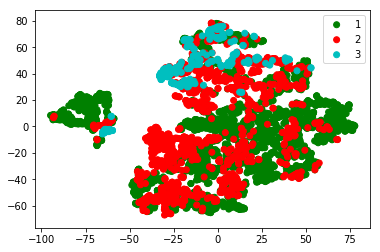

In [17]:
# plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=Y_colors.values)

for i in list(set(Y1)):
    scatter = plt.scatter(tsne_data[:, 0][Y1==i], tsne_data[:, 1][Y1==i], c=Y_colors.values[Y1==i], label=str(i))
plt.legend()

### KernelPCA

In [18]:
from sklearn.decomposition import KernelPCA
from sklearn.manifold import MDS
kpca = KernelPCA(n_components=n_components)
k_pca_data = kpca.fit_transform(X)

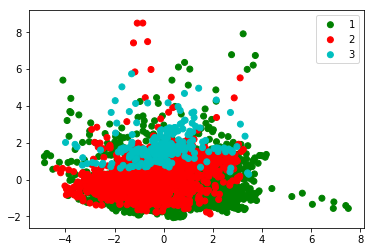

In [19]:
# plt.scatter(k_pca_data[:, 0], k_pca_data[:, 1], c=Y_colors.values)

for i in list(set(Y1)):
    scatter = plt.scatter(k_pca_data[:, 0][Y1==i], k_pca_data[:, 1][Y1==i], c=Y_colors.values[Y1==i], label=str(i))
plt.legend()

## Well ID

### PCA

In [20]:
Y_colors = Y2.apply(lambda x: colors[x])

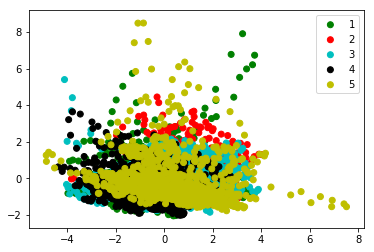

In [21]:
# plt.scatter(pca_data[:, 0], pca_data[:, 1], c=Y_colors.values)

for i in list(set(Y2)):
    scatter = plt.scatter(pca_data[:, 0][Y2==i], pca_data[:, 1][Y2==i], c=Y_colors.values[Y2==i], label=str(i))
plt.legend()

### TSNE

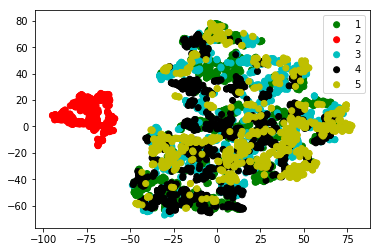

In [22]:
# plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=Y_colors.values)

for i in list(set(Y2)):
    scatter = plt.scatter(tsne_data[:, 0][Y2==i], tsne_data[:, 1][Y2==i], c=Y_colors.values[Y2==i], label=str(i))
plt.legend()

### KernelPCA

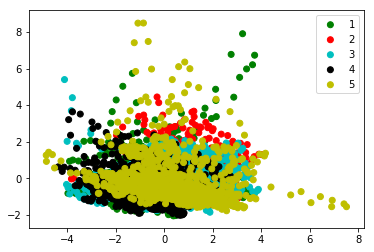

In [23]:
# plt.scatter(k_pca_data[:, 0], k_pca_data[:, 1], c=Y_colors.values)

for i in list(set(Y2)):
    scatter = plt.scatter(k_pca_data[:, 0][Y2==i], k_pca_data[:, 1][Y2==i], c=Y_colors.values[Y2==i], label=str(i))
plt.legend()

# without depth well

In [24]:
X = data[["DT", "GR", "LLD", "NPHI", "RHOB"]].values
ss = StandardScaler()
X = ss.fit_transform(X)

In [25]:
Y1 = data['Log_Facies']
Y2 = data['WellID']

# PCA

In [26]:
Y_colors = Y2.apply(lambda x: colors[x])

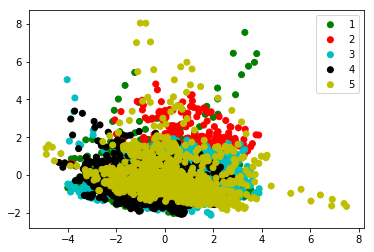

In [27]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
# plt.scatter(pca_data[:, 0], pca_data[:, 1], c=Y_colors.values)

for i in list(set(Y2)):
    scatter = plt.scatter(pca_data[:, 0][Y2==i], pca_data[:, 1][Y2==i], c=Y_colors.values[Y2==i], label=str(i))
plt.legend()

# TSNE

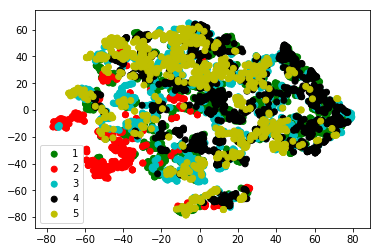

In [28]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)
# plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=Y_colors.values)

for i in list(set(Y2)):
    scatter = plt.scatter(tsne_data[:, 0][Y2==i], tsne_data[:, 1][Y2==i], c=Y_colors.values[Y2==i], label=str(i))
plt.legend()

# KernelPCA

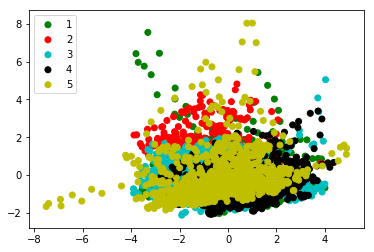

In [29]:
kpca = KernelPCA(n_components=n_components)
k_pca_data = kpca.fit_transform(X)
# plt.scatter(k_pca_data[:, 0], k_pca_data[:, 1], c=Y_colors.values)

for i in list(set(Y2)):
    scatter = plt.scatter(k_pca_data[:, 0][Y2==i], k_pca_data[:, 1][Y2==i], c=Y_colors.values[Y2==i], label=str(i))
plt.legend()

In [30]:
Y_colors.value_counts()

g    1177
k    1094
c    1025
y     953
r     446
Name: WellID, dtype: int64

### without depth log facies

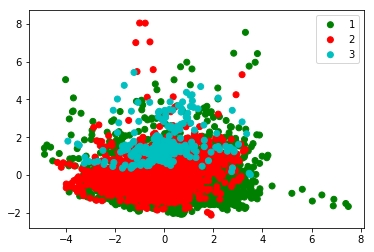

In [31]:
X = data[["DT", "GR", "LLD", "NPHI", "RHOB"]].values
ss = StandardScaler()
X = ss.fit_transform(X)
Y1 = data['Log_Facies']
Y2 = data['WellID']

Y_colors = Y1.apply(lambda x: colors[x])
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
# plt.scatter(pca_data[:, 0], pca_data[:, 1], c=Y_colors.values)

for i in list(set(Y1)):
    scatter = plt.scatter(pca_data[:, 0][Y1==i], pca_data[:, 1][Y1==i], c=Y_colors.values[Y1==i], label=str(i))
plt.legend()

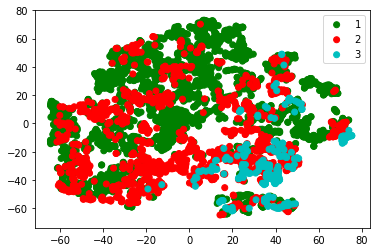

In [32]:
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)
# plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=Y_colors.values)

for i in list(set(Y1)):
    scatter = plt.scatter(tsne_data[:, 0][Y1==i], tsne_data[:, 1][Y1==i], c=Y_colors.values[Y1==i], label=str(i))
plt.legend()

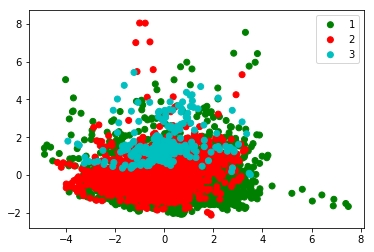

In [33]:
kpca = KernelPCA(n_components=n_components)
k_pca_data = kpca.fit_transform(X)
# plt.scatter(k_pca_data[:, 0], k_pca_data[:, 1], c=Y_colors.values)

for i in list(set(Y1)):
    scatter = plt.scatter(k_pca_data[:, 0][Y1==i], k_pca_data[:, 1][Y1==i], c=Y_colors.values[Y1==i], label=str(i))
plt.legend()